In [29]:
from sklearn.datasets import load_iris, load_breast_cancer
from keras.datasets.fashion_mnist import load_data
import numpy as np
from sklearn.manifold import t_sne
import umap
from matplotlib import pyplot as plt

In [6]:
# Load the data
iris = load_iris()
cancer = load_breast_cancer()
mnist = load_data()

In [17]:
# Cut down to 4000 samples
mnist_data = mnist[0][0]
mnist_target = mnist[0][1]

draw = np.random.choice(range(len(mnist_data)), 4000, replace=False)

mnist_data = mnist_data[draw]
mnist_target = mnist_target[draw]

# reshape MNIST into one long vector
mnist_data = mnist_data.reshape(len(mnist_data),-1)

In [18]:
# Prepare the models and the data
tsne = t_sne.TSNE()
u = umap.UMAP()

data = [iris.data, cancer.data, mnist_data]
targets = [iris.target, cancer.target, mnist_target]
names = ["Iris","Breast Cancer","Fashion MNIST"]



data <class 'numpy.ndarray'>


C:\Users\hayde\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


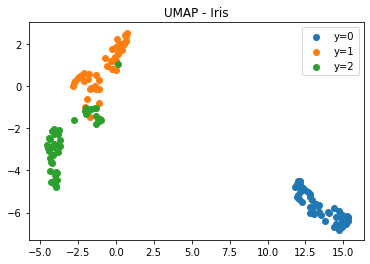

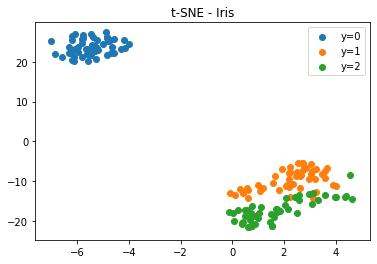

data <class 'numpy.ndarray'>


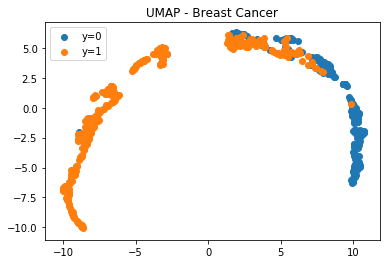

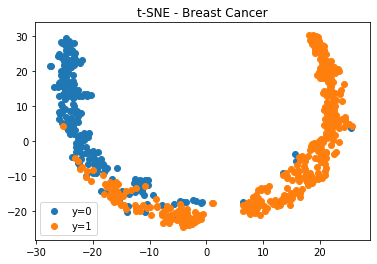

data <class 'numpy.ndarray'>


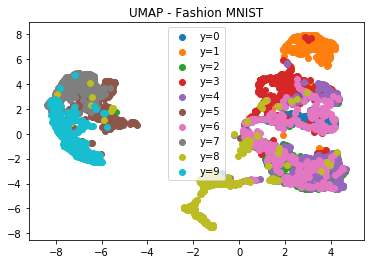

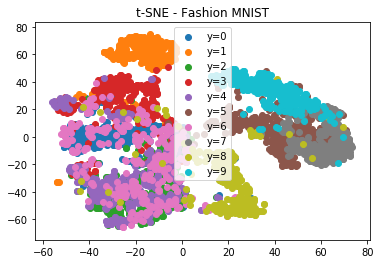

In [32]:
for d,t,n in zip(data, targets,names):
    print("data",type(d))
    u_data = u.fit_transform(d)
    for y in set(t):
        plt.scatter(*u_data[t==y].T,label="y={}".format(y))
    plt.legend()
    plt.title("UMAP - {}".format(n))
    plt.show()
    
    t_data = tsne.fit_transform(d)
    for y in set(t):
        plt.scatter(*t_data[t==y].T,label="y={}".format(y))
    plt.legend()
    plt.title("t-SNE - {}".format(n))
    plt.show()

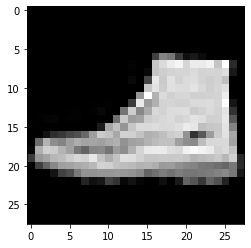

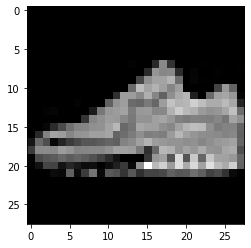

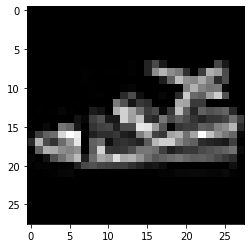

In [42]:
cyan = mnist[0][0][draw][mnist_target == 9][0]
gray = mnist[0][0][draw][mnist_target == 7][0]
brown = mnist[0][0][draw][mnist_target == 5][0]

plt.imshow(cyan,cmap="gray")
plt.show()
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(brown,cmap="gray")
plt.show()

It looks like everything in the leftmost cluster of the UMAP plot corresponds to different types of shoes, sandals, and boots. So yes, it makes sense that they form a cluster!